In [ ]:
导包,np
从numpy.fft导入fft、ifft
导入图片库PIL中的image

第一步读取数据

In [1]:
import numpy as np
#fft 傅里叶变换,ifft傅里叶反转
from numpy.fft import fft,ifft
from PIL import Image

In [2]:
cat = Image.open('cat.jpg')

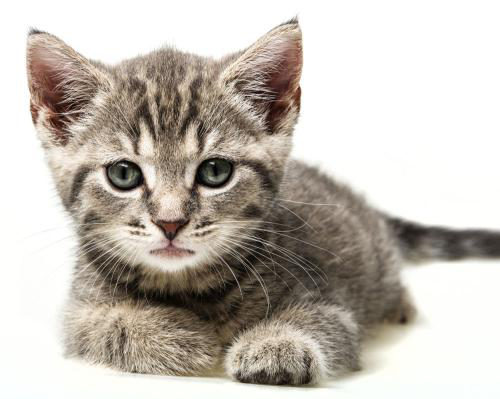

In [3]:
cat

In [4]:
cat.show()

转换成int类型的数据,int8 ==128

In [8]:
cat_data = np.fromstring(cat.tobytes(),dtype=np.int8)
display(cat_data.shape,cat_data)

H:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  """Entry point for launching an IPython kernel.


(598500,)

array([-1, -1, -1, ..., -6, -2, -3], dtype=int8)

傅里叶转换,傅里叶转换的结果包含实数和虚数

In [9]:
cat_data_fft = fft(cat_data)
# 将真实的数据转换成频域
cat_data_fft

array([-1212869.              +0.        j,
       -1614632.34879338+2519411.2459042 j,
       -2088205.3663756 -2193331.29949642j, ...,
        2179184.52657176 +336407.83555693j,
       -2088205.36637558+2193331.29949643j,
       -1614632.3487934 -2519411.24590418j])

将傅里叶的数据去除低频的波,设置为0
np.where(np.abs(fft_result)<le5,0,fft_result)

In [10]:
#条件
cond = np.abs(cat_data_fft)<1e5

#根据条件获取索引
inds = np.where(cond)

#修改,将低频数据，设置为0
cat_data_fft[inds] = 0

使用傅里叶进行反转`

In [11]:
cat_data_ifft = ifft(cat_data_fft)
cat_data_ifft

array([16.18880329-1.92809838e-14j,  1.74294382+3.03919699e-14j,
       -6.37016056+5.45124377e-14j, ...,  5.70398799+1.22476190e-13j,
       -5.69869974+2.51796927e-14j, -9.73656657-6.79794777e-15j])

获取实数
np.real()

In [12]:
cat_data_real = np.real(cat_data_ifft)
cat_data_real

array([16.18880329,  1.74294382, -6.37016056, ...,  5.70398799,
       -5.69869974, -9.73656657])

去除小数部分

In [14]:
cat_data_result = np.int8(cat_data_real)
cat_data_result

array([16,  1, -6, ...,  5, -5, -9], dtype=int8)

将一维的数组,通过Image进行转换图片

In [16]:
cat_data_result.shape

(598500,)

In [17]:
cat_outline = Image.frombytes(mode = cat.mode,size=cat.size,data=cat_data_result)

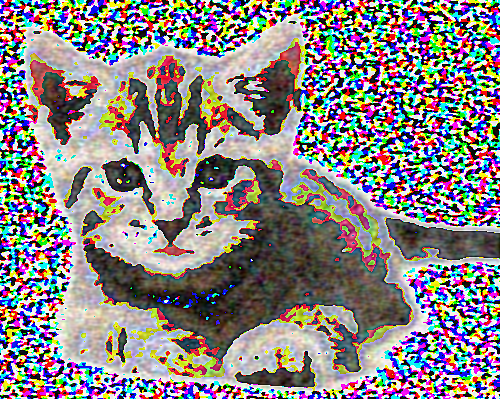

In [18]:
cat_outline

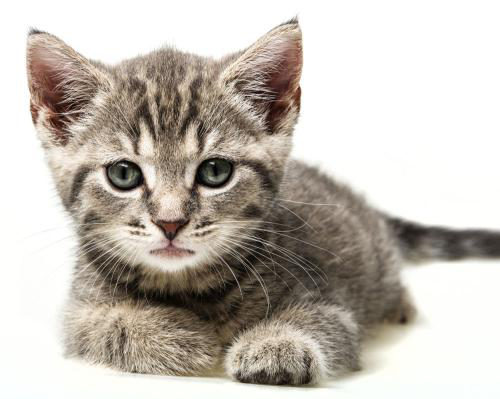

In [19]:
cat